In [14]:
from time import time, ctime
print("Timestamp: " + ctime(time()))
print("Akshat Kumar 242211003 11:33 am")

Timestamp: Wed Apr  2 06:04:13 2025
Akshat Kumar 242211003 11:33 am


In [ ]:
!pip install tensorflow

In [ ]:
import keras
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Preprocessing

In [ ]:
# class labels
planes = 0
birds = 2

# Filter Class label data
train_filter = np.isin(y_train, [planes, birds]).flatten()
test_filter = np.isin(y_test, [planes, birds]).flatten()

# Gather only test & train data for filtered class
x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]

x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

# Converting to binnary classification
y_train_filtered = np.where(y_train_filtered==birds,1,0)
y_test_filtered = np.where(y_test_filtered==birds,1,0)

# flatten the image
x_train_filtered = x_train_filtered.reshape(x_train_filtered.shape[0],-1).astype('float32')
x_test_filtered = x_test_filtered.reshape(x_test_filtered.shape[0],-1).astype('float32')

#  Normalize the pixel values
x_train_normalized = x_train_filtered/255.0
x_test_normalized = x_test_filtered/255.0


# logistic regression

In [ ]:

# train the logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_normalized,y_train_filtered)

#  predection
y_pred_train = model.predict(x_train_normalized)
y_pred_test = model.predict(x_test_normalized)

# Evaluate the model
train_accuracy = accuracy_score(y_train_filtered, y_pred_train)
test_accuracy = accuracy_score(y_test_filtered, y_pred_test)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8517
Test Accuracy: 0.7875


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_filtered,y_pred_test)
print("Confusion Matrix:\n",conf_matrix)


Confusion Matrix:
 [[796 204]
 [221 779]]


# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#  PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_normalized)
x_test_pca = pca.transform(x_test_normalized)

# SVM
svm = SVC(kernel='linear',C=1.0)
svm.fit(x_train_pca,y_train_filtered)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

Accuracy: 0.8055
Classification Report:
               precision    recall  f1-score   support

    Airplane       0.79      0.82      0.81      1000
        Bird       0.82      0.79      0.80      1000

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



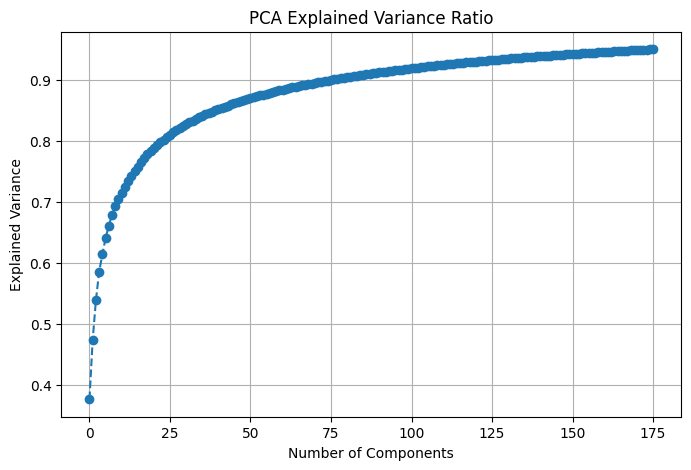

In [ ]:
# Prediction
y_pred = svm.predict(x_test_pca)

# Evaluate performance
accuracy = accuracy_score(y_test_filtered, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_filtered, y_pred, target_names=["Airplane", "Bird"]))

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid()
plt.show()